# Topic 1  Overview of Machine Learning and Scikit Learn

In [ ]:
import sklearn

# Topic 2 Classification

## Step 1: Prepare the Data

### Import Data

In [ ]:
# Load Iris dataset
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/tertiarycourses/datasets/master/iris.csv"
                     
X = pd.read_csv(dataset_path)
X

### Split the Features and Target

In [ ]:
X = X.dropna()
y = X.pop('species')
y

### Encode the Label

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

### Scale/Normalize the Features

In [ ]:
# Scale the input data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled

### Split and Randomize Training and Testing Dataset

In [ ]:
# Split and Randomize the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=100)

In [ ]:
X_train

In [ ]:
y_train

## Step 2 Define the Model

In [ ]:
# KNN Classifier

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

## Step 3 Train the Model

In [ ]:
clf.fit(X_train,y_train)

## Step 4 Evaluate the Model

In [ ]:
clf.score(X_test,y_test)

In [ ]:
X_pred = [[5.1,3.5,1.4,0.2]]
X_pred = scaler.transform(X_pred)
clf.predict(X_pred)

## Step 5 Save the Model

In [ ]:
from sklearn.externals import joblib
joblib.dump(clf, 'iris.pkl') 

## Step 6 Load the Model for Inference

In [ ]:
from sklearn.externals import joblib
new_clf = joblib.load('iris.pkl')

In [ ]:
import numpy as np

X_new = np.array([[6.7,3.1,4.7,1.5]])
y = new_clf.predict(scaler.transform(X_new))

label = {0:'sentosa',1:'versicolor',2:'virginica'}
print('The flower is ',label[y[0]])

## Ex: Classifiers

In [ ]:
# Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

In [ ]:
# SVM Classifier

from sklearn.svm import SVC 
clf = SVC()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

In [ ]:
# Guassian Navie Bayes Classifer

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

In [ ]:
# Decision Tree Classifer

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

In [ ]:
# SGD Classifer

from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

## Ensemble Methods

### Bagging

In [ ]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

### Boosting

In [ ]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

In [ ]:
# AdaBoosting Classifier

from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

### Stacking

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression()
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

clf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

## Ex: Emsemble Methods

### Prepare the Data

In [ ]:
# Load dataset
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/tertiarycourses/datasets/master/winequality-red.csv"
                     
X = pd.read_csv(dataset_path,sep=';')
X

In [ ]:
X = X.dropna()
y = X.pop('quality')
y

In [ ]:
# Scale the input data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
# Split and Randomize the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

### Define, Train and Evalaute the Model


In [ ]:
# Decision Tree Classifer

from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

In [ ]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

In [ ]:
# Gradient Boosting Tree Classifier

from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

In [ ]:
# Stacking Classifer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression()
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

clf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

In [ ]:
i = 50
x = scaler.transform(X_test.iloc[i:i+1])
print('The predicted wine quality is ', clf.predict(x)[0])
print('The actual wine quality is ',y_test.iloc[i])

## Confusion Matrix

In [ ]:
# Load Iris dataset
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/tertiarycourses/datasets/master/iris.csv"
                     
X = pd.read_csv(dataset_path)

X = X.dropna()
y = X.pop('species')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=100)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_test,y_test)

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))

## Ex: Confusion Matrix

In [ ]:
# Load Iris dataset
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/tertiarycourses/datasets/master/winequality-red.csv"
                     
X = pd.read_csv(dataset_path,sep=';')

X = X.dropna()
y = X.pop('quality')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=100)

In [ ]:
# KNN Classifier

from sklearn import neighbors
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
confusion_matrix(y_test,y_pred)

In [ ]:
# Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
confusion_matrix(y_test,y_pred)

In [ ]:
# SVM Classifier

from sklearn import svm 
clf = svm.SVC()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
confusion_matrix(y_test,y_pred)

In [ ]:
# GNB Classifier

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
confusion_matrix(y_test,y_pred)

In [ ]:
# Decision Tree Classifer

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
confusion_matrix(y_test,y_pred)

In [ ]:
# SGD Classifer

from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
confusion_matrix(y_test,y_pred)

## Metrics: Accuracy, Precision, Recall, F1 Scores

In [ ]:
# Load Iris dataset
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/tertiarycourses/datasets/master/iris.csv"
                     
X = pd.read_csv(dataset_path)

X = X.dropna()
y = X.pop('species')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y[y==2]=0

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=100)

In [ ]:
# K Nearest Neighbor Classifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

from sklearn import neighbors
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('F1 Score = ',f1_score(y_test,y_pred))

In [ ]:
# Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('F1 Score = ',f1_score(y_test,y_pred))

In [ ]:
# SVM Classifier

from sklearn import svm 
clf = svm.SVC()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('F1 Score = ',f1_score(y_test,y_pred))

In [ ]:
# Decision Tree Classifer

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('F1 Score = ',f1_score(y_test,y_pred))

### Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


## Ex: : Metrics

In [ ]:
# Load Wine Quality dataset

import pandas as pd
dataset_path = "https://raw.githubusercontent.com/tertiarycourses/datasets/master/winequality-red.csv"

X = pd.read_csv(dataset_path,sep=";")

X = X.dropna()
y = X.pop('quality')

y[y<6]=0
y[y>=6]=1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=100)
y_train

In [ ]:
# KNN Classifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report

from sklearn import neighbors
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('F1 Score = ',f1_score(y_test,y_pred))

print(classification_report(y_test, y_pred))

In [ ]:
# GNB Classifier

clf = GaussianNB()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

y_pred = clf.predict(X_test)
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('F1 Score = ',f1_score(y_test,y_pred))

print(classification_report(y_test, y_pred))

In [ ]:
# SVM Classifier

from sklearn import svm 
clf = svm.SVC()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('F1 Score = ',f1_score(y_test,y_pred))

print(classification_report(y_test, y_pred))

## ROC Curve and AUC

In [ ]:
# Load Iris dataset
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/tertiarycourses/datasets/master/iris.csv"
                     
X = pd.read_csv(dataset_path)

X = X.dropna()
y = X.pop('species')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y[y==2]=0

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=100)

In [ ]:
from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression()

clf.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt

# predict probabilities
y_probs = clf.predict_proba(X_test)

# keep probabilities for the positive outcome only
y_probs = y_probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test,y_probs)

plt.plot(fpr,tpr,'o-')
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
auc_score = roc_auc_score(y_test, y_probs)
print("AUC = ", auc_score)

## Ex: ROC and AOC

In [ ]:
# Load Wine Quality dataset

import pandas as pd
dataset_path = "https://raw.githubusercontent.com/tertiarycourses/datasets/master/winequality-red.csv"

X = pd.read_csv(dataset_path,sep=";")

X = X.dropna()
y = X.pop('quality')

y[y<6]=0
y[y>=6]=1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=100)
y_train

In [ ]:
from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression()

clf.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt

# predict probabilities
y_probs = clf.predict_proba(X_test)

# keep probabilities for the positive outcome only
y_probs = y_probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test,y_probs)

plt.plot(fpr,tpr,'o-')
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
auc_score = roc_auc_score(y_test, y_probs)
print("AUC = ", auc_score)

# Topic 3 Regression

## Load the Data

In [ ]:
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"                     
X = pd.read_csv(dataset_path)
X

### Prepare the Data

In [ ]:
# Remove missing data
X = X.dropna()

In [ ]:
# Define input and output
y = X.pop('medv')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
# Split and Randomize the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=100)

In [ ]:
X_train

## Define the Model

In [ ]:
# Linear Regression Model

from sklearn.linear_model import LinearRegression 
lm = LinearRegression()


### Train the Model

In [ ]:
lm.fit(X_train,y_train)

## Evaluate the Model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

yhat = lm.predict(X_test)
mse = mean_squared_error(y_test,yhat)
print('Mean Squared Error, Testing: ',mse)
rsq = r2_score(y_test,yhat)
print('R-square, Testing: ',rsq)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt 

yhat = lm.predict(X_test)

plt.scatter(y_test,yhat)
plt.xlabel('Actual Housing Price')
plt.ylabel('Predicted Price')
plt.plot([0, 50], [0, 50],'r')

## Ex: Linear Regression

In [ ]:
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/tertiarycourses/datasets/master/iris.csv"
                     
X = pd.read_csv(dataset_path)
X

In [ ]:
X = X.dropna()
X.pop('species')
X

In [ ]:
y = X.pop('sepal_width')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [ ]:
# Split and Randomize the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=100)

In [ ]:
# Linear Regression Model

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

yhat = lm.predict(X_test)
mse = mean_squared_error(y_test,yhat)
print('Mean Squared Error, Testing: ',mse)
rsq = r2_score(y_test,yhat)
print('R-square, Testing: ',rsq)

In [ ]:
import matplotlib.pyplot as plt 

yhat = lm.predict(X_test)

plt.scatter(y_test,yhat)
plt.xlabel('Actual Sepal Width')
plt.ylabel('Predicted Sepal Width')
plt.plot([0, 5], [0, 5],'r')

## Regularizations

### Ridge Regularization

In [ ]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.1) 
rr.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

yhat = rr.predict(X_
                  test)
mse = mean_squared_error(y_test,yhat)
print('Mean Squared Error, Testing: ',mse)
rsq = r2_score(y_test,yhat)
print('R-square, Testing: ',rsq)

### Lasso Regularizaton

In [ ]:
from sklearn.linear_model import Lasso
lr = Lasso(alpha=0.01) 
lr.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

yhat = lr.predict(X_test)
mse = mean_squared_error(y_test,yhat)
print('Mean Squared Error, Testing: ',mse)
rsq = r2_score(y_test,yhat)
print('R-square, Testing: ',rsq)

### Elastic Net Regularization

In [ ]:
from sklearn.linear_model import ElasticNet
er = ElasticNet(alpha=0.01,l1_ratio=0.5)
er.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

yhat = er.predict(X_test)
mse = mean_squared_error(y_test,yhat)
print('Mean Squared Error, Testing: ',mse)
rsq = r2_score(y_test,yhat)
print('R-square, Testing: ',rsq)

# Topic 4 Clustering

## Load the Data

In [ ]:
from sklearn.datasets.samples_generator import make_blobs

centers = [[1,1],[1.5,1.5],[2,2]]
X,y = make_blobs(n_samples=100,centers = centers,cluster_std=0.1)

import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1])

## load the Model

In [ ]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=3,random_state=10)

## Train the Model

In [ ]:
cluster.fit(X)

## Evaluate the Model

In [ ]:
cluster.labels_

In [ ]:
cluster.cluster_centers_

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title("Actual")
plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,1],c=cluster.labels_)
plt.title("Prediction")

## Silhouette Analysis

In [ ]:
from sklearn.metrics import silhouette_score

for i in range(2,10):
    cluster = KMeans(n_clusters=i,random_state=10)
    cluster.fit(X)
    s = silhouette_score(X, cluster.labels_)
    print('Cluster: ',i, 'Silhouette Score :',s )

## Ex: KMeans Clustering

In [ ]:
# Load Iris dataset
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/tertiarycourses/datasets/master/iris.csv"
                     
X = pd.read_csv(dataset_path)

X = X.dropna()
y = X.pop('species')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
X

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for i in range(2,10):
    cluster = KMeans(n_clusters=i,random_state=10)
    cluster.fit(X_scaled)
    s = silhouette_score(X_scaled, cluster.labels_)
    print('Cluster: ',i, 'Silhouette Score :',s )

In [ ]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=3,random_state=10)
cluster.fit(X)

In [ ]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,5))
x1 = 'petal_length'
x2 = 'petal_width'
plt.subplot(1,2,1)
plt.scatter(X[x1],X[x2],c=y)
plt.title("Actual")
plt.subplot(1,2,2)
plt.scatter(X[x1],X[x2],c=cluster.labels_)
plt.title("Prediction")

## Hierarchical Agglormerative Clustering

In [ ]:
from sklearn.datasets.samples_generator import make_blobs

centers = [[1,1],[1.5,1.5],[2,2]]
X,y = make_blobs(n_samples=100,centers = centers,cluster_std=0.1)

import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1])

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X)
d = dendrogram(Z)
plt.plot(d)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 3)
cluster.fit(X)

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title("Actual")
plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,1],c=cluster.labels_)
plt.title("Prediction")

## Ex: Hierarchical Agglormerative Clustering

In [ ]:
# Load Iris dataset
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/tertiarycourses/datasets/master/iris.csv"
                     
X = pd.read_csv(dataset_path)

X = X.dropna()
y = X.pop('species')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
X

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X_scaled)
d = dendrogram(Z)
plt.plot(d)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 3)
cluster.fit(X_scaled)

In [ ]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(20,10))
x1 = 'petal_length'
x2 = 'petal_width'
plt.subplot(1,2,1)
plt.scatter(X[x1],X[x2],c=y)
plt.title("Actual")
plt.subplot(1,2,2)
plt.scatter(X[x1],X[x2],c=cluster.labels_)
plt.title("Prediction")

# Topic 5 Dimension Reduction

In [ ]:
import numpy as np

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])


In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1])
plt.show()

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit_transform(X)

In [ ]:
pca.explained_variance_

In [ ]:
pca.explained_variance_ratio_

In [ ]:
pca.components_

## PCA on Iris Dataset

## Exercise: PCA on K-Means Clustering

In [40]:
# Load Iris dataset
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/tertiarycourses/datasets/master/iris.csv"
                     
X = pd.read_csv(dataset_path)

X = X.dropna()
y = X.pop('species')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [43]:
X_t= pca.fit_transform(X_scaled)

In [44]:
pca.explained_variance_

array([2.93035378, 0.92740362])

In [45]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [48]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=3)
cluster.fit(X_scaled)

cluster2 = KMeans(n_clusters=3)
cluster2.fit(X_t)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0, 0.5, 'P2')

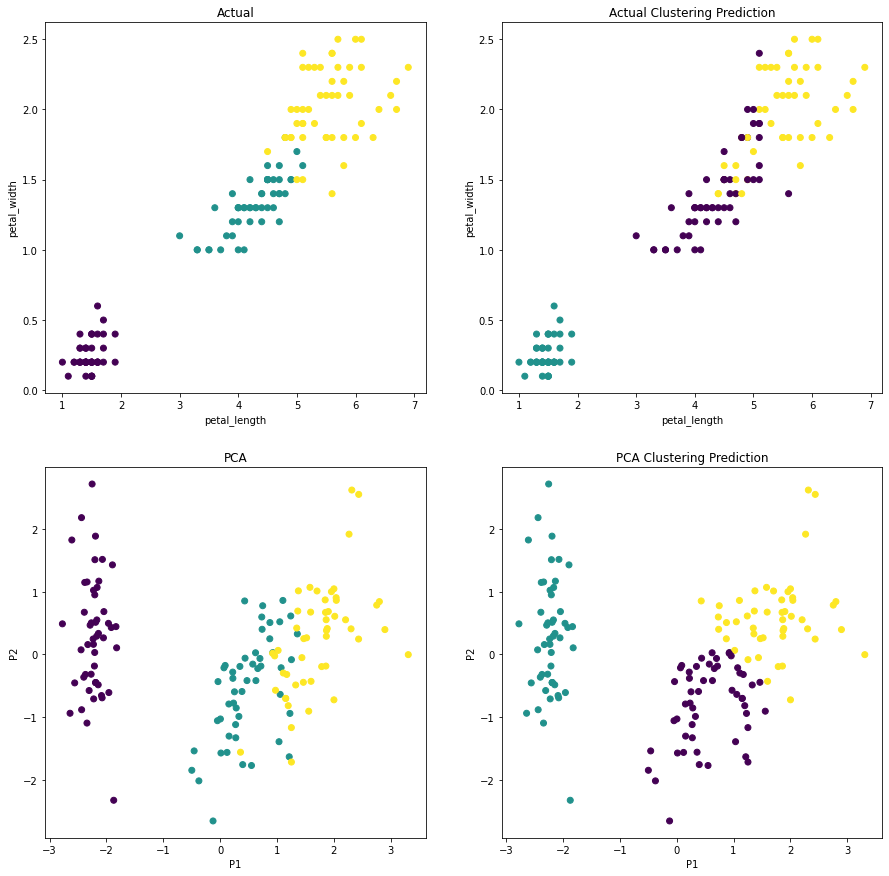

In [53]:
import matplotlib.pyplot as plt

x1 = 'petal_length'
x2 = 'petal_width'

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.scatter(X[x1],X[x2],c=y)
plt.title("Actual")
plt.xlabel(x1)
plt.ylabel(x2)
plt.subplot(2,2,2)
plt.scatter(X[x1],X[x2],c=cluster.labels_)
plt.title("Actual Clustering Prediction")
plt.xlabel(x1)
plt.ylabel(x2)

plt.subplot(2,2,3)
plt.scatter(X_t[:,0],X_t[:,1],c=y)
plt.title('PCA')
plt.xlabel('P1')
plt.ylabel('P2')

plt.subplot(2,2,4)
plt.scatter(X_t[:,0],X_t[:,1],c=cluster2.labels_)
plt.title('PCA Clustering Prediction')
plt.xlabel('P1')
plt.ylabel('P2')